# Vector Space Model

Adapted from [this](https://de.dariah.eu/tatom/working_with_text.html) blog post, written by [Allen Riddell](http://www.ariddell.org/).

One of the benefits of the DTM is that it allows us to think about text within the bounds of geometry, which then allows us to think about the "distance" between texts. Today's tutorial will explore how we might use distance measures in our text analysis workflow, and toward what end.

### Learning Goals
* Gain an intuition about how we might think about, and measure, the distance between texts
* Learn how to measure distances using `scikit-learn`
* Learn how to visualize distances in a few ways, and how that might help us in our text analysis project
* Learn more about the flexibilities and range of tools in `scikit-learn`

### Outline

<ol start="0">
  <li>Vectorizing our text: The Sparse DTM to Numpy Array</li>
  <li>Comparing Texts</li>
  <li>Visualizing Distance</li>
  <li>Clustering Text based on Distance Metrics</li>
  <li>K-Means Clustering</li>
</ol>

### Key Terms

* Euclidean Distance
    * In mathematics, the Euclidean distance or Euclidean metric is the "ordinary" (i.e. straight-line) distance between two points in Euclidean space. With this distance, Euclidean space becomes a metric space.
* Cosine Similarity
    * Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any other angle.
* Multidimensional Scaling
    * Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. It refers to a set of related ordination techniques used in information visualization, in particular to display the information contained in a distance matrix.
* Dendrogram
    * A dendrogram (from Greek dendro "tree" and gramma "drawing") is a tree diagram frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering.
* K-Means Clustering
    * k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


### 0. From DTM to Numpy Array

First, let's create our DTM, and then turn it from a sparse matrix to a regular (dense) array.

We'll use a different input option than we have, an option called `filename`.

In [1]:
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer

filenames = ['../data/Alcott_GarlandForGirls.txt',
            '../data/Austen_PrideAndPrejudice.txt',
            '../data/Machiavelli_ThePrince.txt',
            '../data/Marx_CommunistManifesto.txt']

vectorizer = CountVectorizer(input='filename', encoding='utf-8',stop_words='english') #filname input, which bypases reading in files
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix
vocab = vectorizer.get_feature_names()  # a list
dtm

<4x12811 sparse matrix of type '<class 'numpy.int64'>'
	with 20245 stored elements in Compressed Sparse Row format>

In [2]:
dtm = dtm.toarray()  # convert to a regular, dense array
vocab = np.array(vocab)
dtm

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 3, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 1, 1]], dtype=int64)

### 1. Comparing texts
Arranging our texts in a document-term matrix make available a range of exploratory procedures. For example, calculating a measure of similarity between texts becomes simple. Since each row of the document-term matrix is a sequence of a novel’s word frequencies, it is possible to put mathematical notions of similarity (or distance) between sequences of numbers in service of calculating the similarity (or distance) between any two novels. One frequently used measure of distance between vectors (a measure easily converted into a measure of similarity) is Euclidean distance. The Euclidean distance between two vectors in the plane should be familiar from geometry, as it is the length of the hypotenuse that joins the two vectors. For instance, consider the Euclidean distance between the vectors  \begin{align}
\overrightarrow{x}=(1,3) \space \space and\space\space\overrightarrow{y}=(4,2)  \end{align}

the Euclidian distance can be calculated as follows:
\begin{align}
\sqrt{(1-4)^2 + (3-2)^2} = \sqrt{10}
\end{align}

>Note
Measures of distance can be converted into measures of similarity. If your measures of distance are all between zero and one, then a measure of similarity could be one minus the distance. (The inverse of the distance would also serve as a measure of similarity.)


Distance between two vectors:

![alt text](https://de.dariah.eu/tatom/_images/tikz-af04f26d9e919ae68f473524fd99b7d0276afe7d.png)



>Note
More generally, given two vectors \begin{align} \overrightarrow{x} \space \space and\space\space\overrightarrow{y}\end{align} 

>in *p*-dimensional space, the Euclidean distance between the two vectors is given by

>\begin{align}
||\overrightarrow{x} −\overrightarrow{y}||=\sqrt{\sum_{i=1}^P (x_i−y_i)^2}
\end{align}

This concept of distance is not restricted to two dimensions. For example, it is not difficult to imagine the figure above translated into three dimensions. We can also persuade ourselves that the measure of distance extends to an arbitrary number of dimensions; for any two matched components in a pair of vectors (such as x<sub>2</sub> and y<sub>2</sub>), differences increase the distance.

Since two novels in our corpus now have an expression as vectors, we can calculate the Euclidean distance between them. We can do this by hand or we can avail ourselves of the `scikit-learn` function `euclidean_distances`.

A challenge for you: calculate Euclidean distance of sample texts by hand.


In [3]:
from sklearn.metrics.pairwise import euclidean_distances
euc_dist = euclidean_distances(dtm)
print(filenames[1])
print(filenames[2])
print("\nDistance between Austen and Machiavelli:")
# the distance between Austen and Machiavelli
print(euc_dist[1, 2])

# which is greater than the distance between *Austen* and *Alcott* (index 0)
print("\nDistance between Austen and Machiavelli is greater than the distance between Austen and Alcott:")
euc_dist[1, 2] > euc_dist[0, 1]

../data/Austen_PrideAndPrejudice.txt
../data/Machiavelli_ThePrince.txt

Distance between Austen and Machiavelli:
1870.8802741

Distance between Austen and Machiavelli is greater than the distance between Austen and Alcott:


True

And if we want to use a measure of distance that takes into consideration the length of the novels (an excellent idea), we can calculate the cosine similarity by importing `sklearn.metrics.pairwise.cosine_similarity` and use it in place of `euclidean_distances`.

Cosine similarity measure the angle between two vectors:

![alt text](https://engineering.aweber.com/wp-content/uploads/2013/02/4AUbj.png)

Question: How does length factor into these two equations?

Keep in mind that cosine similarity is a measure of similarity (rather than distance) that ranges between 0 and 1 (as it is the cosine of the angle between the two vectors). In order to get a measure of distance (or dissimilarity), we need to “flip” the measure so that a larger angle receives a larger value. The distance measure derived from cosine similarity is therefore one minus the cosine similarity between two vectors.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

cos_dist = 1 - cosine_similarity(dtm)

np.round(cos_dist, 2)

array([[ 0.  ,  0.46,  0.6 ,  0.77],
       [ 0.46,  0.  ,  0.69,  0.9 ],
       [ 0.6 ,  0.69,  0.  ,  0.7 ],
       [ 0.77,  0.9 ,  0.7 ,  0.  ]])

In [6]:
##EX: 
## 1. Print the cosine distance between Austen and Machiavelli
## 2. Is this distance greater or less than the distance between Austen and Alcott?

print(cos_dist[1, 2])

# which is greater than the distance between *Austen* and
# *Alcott* (index 0)
cos_dist[1, 2] > cos_dist[1, 0]

0.694784908173


True

### 2. Visualizing distances
It is often desirable to visualize the pairwise distances between our texts. A general approach to visualizing distances is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, “multidimensional scaling” (MDS) and family of functions in `scikit-learn`.

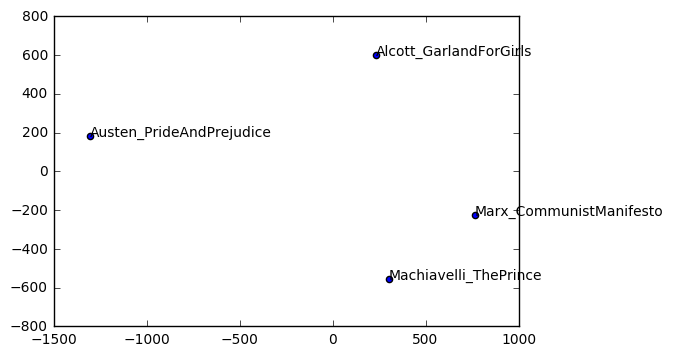

In [7]:
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(euc_dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]


for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()

### 3. Clustering texts based on distance
Clustering texts into discrete groups of similar texts is often a useful exploratory step. For example, a researcher may be wondering if certain textual features partition a collection of texts by author or by genre. Pairwise distances alone do not produce any kind of classification. To put a set of distance measurements to work in classification requires additional assumptions, such as a definition of a group or cluster.

The ideas underlying the transition from distances to clusters are, for the most part, common sense. Any clustering of texts should result in texts that are closer to each other (in the distance matrix) residing in the same cluster. There are many ways of satisfying this requirement; there no unique clustering based on distances that is the “best”. One strategy for clustering in circulation is called Ward’s method. Rather than producing a single clustering, Ward’s method produces a hierarchy of clusterings, as we will see in a moment. All that Ward’s method requires is a set of pairwise distance measurements–such as those we calculated a moment ago. Ward’s method produces a hierarchical clustering of texts via the following procedure:

1. Start with each text in its own cluster
2. Until only a single cluster remains,
    * Find the closest clusters and merge them. The distance between two clusters is the change in the sum of squared distances when they are merged.
3. Return a tree containing a record of cluster-merges.

The function [scipy.cluster.hierarchy.ward](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) performs this algorithm and returns a tree of cluster-merges. The hierarchy of clusters can be visualized using `scipy.cluster.hierarchy.dendrogram`.



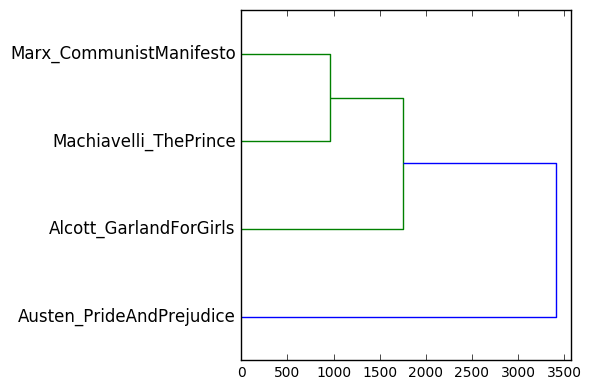

In [8]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(euc_dist)

dendrogram(linkage_matrix, orientation="right", labels=names)

plt.tight_layout()  # fixes margins

plt.show()

### 4. K-Means Clustering

In the reading today the author clusters whaling routs into 9 clusters. From the dendrogram above, we might expect these four novels to have two clusters: Austen and Alcott, and Machiavelli and Marx.

Let's see if this is the case using k-means clustering, which clusters on Euclidean distance.

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)

clusters = km.fit(dtm)
clusters.labels_

array([0, 1, 0, 0], dtype=int32)

In [10]:
list(zip(filenames, clusters.labels_))

[('../data/Alcott_GarlandForGirls.txt', 0),
 ('../data/Austen_PrideAndPrejudice.txt', 1),
 ('../data/Machiavelli_ThePrince.txt', 0),
 ('../data/Marx_CommunistManifesto.txt', 0)]

In [11]:
print("Top terms per cluster:")
order_centroids = clusters.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind],)
    print()

Top terms per cluster:
Cluster 0:
 little
 said
 gutenberg
 work
 old
 project
 good
 time
 like
 prince
 great
 people
 men
 did
 new
 way
 tm
 things
 make
 away

Cluster 1:
 mr
 elizabeth
 darcy
 said
 mrs
 bennet
 bingley
 jane
 miss
 did
 know
 sister
 soon
 think
 time
 good
 wickham
 lady
 little
 collins



### Exercise:

1. Find the Euclidian distance and cosine distance for the 5 sentences below. Do the distance measures make sense?
2. Visualize the potential clusters using a dendrogram. Do the clusters make sense?
3. How might we make the clusters better?

In [13]:
text0 = 'I like to eat broccoli and bananas.'
text1 = 'I ate a banana and spinach smoothie for breakfast.'
text2 = 'Chinchillas and kittens are cute.'
text3 = 'My sister adopted a kitten yesterday.'
text4 = 'Look at this cute hamster munching on a piece of broccoli.'

text_list = [text0, text1, text2, text3, text4]
#create vector for text "names"
names = ['eat', 'smoothie', 'chinchillas', 'adopted', 'munching']

In [14]:
#solution
ex_vectorizer = CountVectorizer(stop_words='english')
ex_dtm = ex_vectorizer.fit_transform(text_list)  # a sparse matrix
vocab = ex_vectorizer.get_feature_names()  # a list
ex_dtm = ex_dtm.toarray()
ex_dtm

array([[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]], dtype=int64)

In [15]:
ex_euc_dist = euclidean_distances(ex_dtm)
print(text_list[0])
print(text_list[1])
print(text_list[2])
print(ex_euc_dist[0, 2])

ex_euc_dist[0, 2] > ex_euc_dist[0, 1]

I like to eat broccoli and bananas.
I ate a banana and spinach smoothie for breakfast.
Chinchillas and kittens are cute.
2.64575131106


False

In [16]:
ex_cos_dist = 1 - cosine_similarity(ex_dtm)

print(np.round(ex_cos_dist, 2))

print(ex_cos_dist[0,2])

ex_cos_dist[0,2] > ex_cos_dist[0,1]

[[ 0.    1.    1.    1.    0.8 ]
 [ 1.    0.    1.    1.    1.  ]
 [ 1.    1.   -0.    1.    0.76]
 [ 1.    1.    1.    0.    1.  ]
 [ 0.8   1.    0.76  1.   -0.  ]]
1.0


False

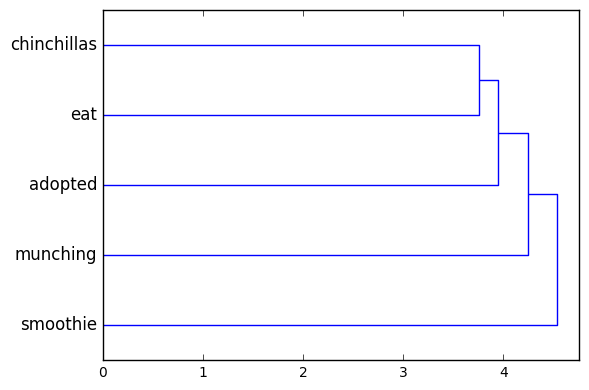

In [18]:
linkage_matrix = ward(ex_euc_dist)

dendrogram(linkage_matrix, orientation="right", labels=names)

plt.tight_layout()  # fixes margins

plt.show()

In [19]:
from nltk.stem.porter import PorterStemmer
import re

porter_stemmer = PorterStemmer()

#remove punctuation
text_list = [re.sub("[,.]", "", sentence) for sentence in text_list]
#stem words
text_list_stemmed = [' '.join([porter_stemmer.stem(word) for word in sentence.split(" ")]) for sentence in text_list]
text_list_stemmed

['I like to eat broccoli and banana',
 'I ate a banana and spinach smoothi for breakfast',
 'Chinchilla and kitten are cute',
 'My sister adopt a kitten yesterday',
 'Look at thi cute hamster munch on a piec of broccoli']

In [20]:
dtm_stem = ex_vectorizer.fit_transform(text_list_stemmed)

In [21]:
ex_dist = 1 - cosine_similarity(dtm_stem)

print(np.round(ex_dist, 2))

print(ex_dist[0,2])
print(ex_dist[0,1])

ex_dist[0,2] > ex_dist[0,1]

[[ 0.    0.78  1.    1.    0.81]
 [ 0.78  0.    1.    1.    1.  ]
 [ 1.    1.   -0.    0.71  0.78]
 [ 1.    1.    0.71  0.    1.  ]
 [ 0.81  1.    0.78  1.    0.  ]]
1.0
0.77639320225


True

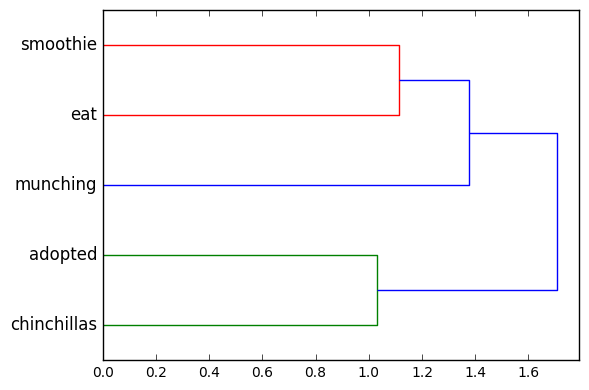

In [22]:
linkage_matrix = ward(ex_dist)

dendrogram(linkage_matrix, orientation="right", labels=names)

plt.tight_layout()  # fixes margins

plt.show()

In [23]:
print(text_list[0])
print(text_list[1])
print(text_list[2])
print(text_list[3])
print(text_list[4])

I like to eat broccoli and bananas
I ate a banana and spinach smoothie for breakfast
Chinchillas and kittens are cute
My sister adopted a kitten yesterday
Look at this cute hamster munching on a piece of broccoli
